# Data Cleaning

1. Import Initial CSV Data Set
2. Missing/Null and Invalid Values
3. 

### 1. Import CSV Data Set

In [1]:
import pandas as pd
import numpy as np

def get_train_data():
    return pd.read_csv('./datasets/train.csv')

df = get_train_data()

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### 2. Missing/Null and Invalid Values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

At first glance, there are many missing values. There some issues with data type e.g. Garage Cars which represents the size of the garage in car capacity should be an integer instead of a float. Also some columns have numeric values but the data are categorical i.e. MS Zoning. Before we can address these issues, need to resolve the missing values in the data set first.

In [3]:
# Check for null value count in all columns

def check_null_values(df):                ### Can get this done by filtering 
                                          ### df_nulls = df.isnull().sum().sort_values(ascending=False)
    count = 0                             ### df_nulls = df_nulls[df_nulls > 0]
    
    for column in df.columns:
        
        count = df[column].isnull().sum()
        
        if count > 0:
            print(column, count)
            
check_null_values(df)

Lot Frontage 330
Alley 1911
Mas Vnr Type 22
Mas Vnr Area 22
Bsmt Qual 55
Bsmt Cond 55
Bsmt Exposure 58
BsmtFin Type 1 55
BsmtFin SF 1 1
BsmtFin Type 2 56
BsmtFin SF 2 1
Bsmt Unf SF 1
Total Bsmt SF 1
Bsmt Full Bath 2
Bsmt Half Bath 2
Fireplace Qu 1000
Garage Type 113
Garage Yr Blt 114
Garage Finish 114
Garage Cars 1
Garage Area 1
Garage Qual 114
Garage Cond 114
Pool QC 2042
Fence 1651
Misc Feature 1986


A quick check reveals many null values in both numeric and categorical columns. I'll look at the categorical columns first.

In [4]:
# Check for invalid/NaN ordinal and norminal values in categorical feature columns

def check_invalid_values(data, valid_values):  ### Same thing here. No need to define new functions for everything. 
    
    errors = []
    
    for column, values in valid_values.items():
        for value in data[column]:
            if pd.isna(value):
                errors.append('NaN value in ' + column)
            elif not value in valid_values[column]:
                errors.append('Invalid ' + column + ' value: ' + value)
                
    return sorted(set(errors))

In [5]:
# Dictionary of column name keys and valid ordinal or norminal values based on data documentation 
# from http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

valid_values = {
    'MS SubClass': [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190],
    'MS Zoning': ['RL', 'RM', 'FV', 'C', 'RH', 'A', 'I', 'RP'],
    'Street': ['Pave', 'Grvl'],
    'Alley': ['Pave', 'Grvl', 'NA'],
    'Lot Shape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'Land Contour': ['Lvl', 'HLS', 'Bnk', 'Low'],
    'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
    'Lot Config': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
    'Land Slope': ['Gtl', 'Mod', 'Sev'],
    'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert',
                     'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown',
                     'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
    'Condition 1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
    'Condition 2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],
    'Bldg Type': ['1Fam', 'TwnhsE', 'Duplex', '2fmCon', 'TwnhsI'],
    'House Style': ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],
    'Overall Qual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Overall Cond': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Roof Style': ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'],
    'Roof Matl': ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'],
    'Exterior 1st': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd',
                     'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'Exterior 2nd': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd',
                     'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'Mas Vnr Type': ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'],
    'Exter Qual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Exter Cond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Foundation': ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
    'Bsmt Qual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Bsmt Cond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Bsmt Exposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
    'BsmtFin Type 1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
    'BsmtFin Type 2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
    'Heating': ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'],
    'Heating QC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Central Air': ['N', 'Y'],
    'Electrical': ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
    'Kitchen Qual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
    'Fireplace Qu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Garage Type': ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'],
    'Garage Finish': ['Fin', 'RFn', 'Unf', 'NA'],
    'Garage Qual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Garage Cond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'Paved Drive': ['Y', 'P', 'N'],
    'Pool QC': ['Ex', 'Gd', 'TA', 'Fa', 'NA'],
    'Fence' : ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'],
    'Misc Feature': ['Elev', 'Gar2', 'Othr', 'Shed', 'TenC', 'NA'],
    'Mo Sold': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'Sale Type': ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth']
}

# Iterate through all categorical features and check for invalid values 
for index, error in enumerate(check_invalid_values(df, valid_values), 1):
    print( str(index) + ': ' + error)

1: Invalid Bldg Type value: Twnhs
2: Invalid Exterior 2nd value: Brk Cmn
3: Invalid Exterior 2nd value: CmentBd
4: Invalid Exterior 2nd value: Wd Shng
5: Invalid MS Zoning value: A (agr)
6: Invalid MS Zoning value: C (all)
7: Invalid MS Zoning value: I (all)
8: Invalid Neighborhood value: Greens
9: Invalid Neighborhood value: GrnHill
10: Invalid Neighborhood value: Landmrk
11: Invalid Neighborhood value: NAmes
12: Invalid Sale Type value: WD 
13: NaN value in Alley
14: NaN value in Bsmt Cond
15: NaN value in Bsmt Exposure
16: NaN value in Bsmt Qual
17: NaN value in BsmtFin Type 1
18: NaN value in BsmtFin Type 2
19: NaN value in Fence
20: NaN value in Fireplace Qu
21: NaN value in Garage Cond
22: NaN value in Garage Finish
23: NaN value in Garage Qual
24: NaN value in Garage Type
25: NaN value in Mas Vnr Type
26: NaN value in Misc Feature
27: NaN value in Pool QC


Listed above are all the issues related to categorical features columns.

For feature Bldg Type, since there are no values of TwnhsI , I assumed that the invalid value of Twnhs is actually TwnhsI.

For feature Exterior 2nd, all erroneous valids are changed in accordance to the corresponding values in the data dictionary.

For feature MS Zoning, all erroneous valids are changed in accordance to the corresponding values in the data dictionary.

For feature Neighborhood, referencing Google and city maps, I've assumed:
- Greens to be Greensboro in the Sommerset district, value will be changed to Somerst
- GrnHill to be Green Hills, which is south of ISU, value will be changed to SWISU
- Landmrk refers to the Old Town historic district, value will be changed to OldTown
- NAmes to be Names, value will be changed to match the data dictionary

For feature Sale Type, the values contain a trailing whitespace that will be removed. 

In [6]:
# Dictionary of column name keys and mapping of error values to new correct values based on data documentation 
# and stated assumptions.

replace_values = {'Bldg Type': {'Twnhs': 'TwnhsI'},
                  'Exterior 2nd': {'Brk Cmn': 'BrkComm', 'CmentBd': 'CemntBd', 'Wd Shng': 'Wd Sdng'},
                  'MS Zoning': {'A (agr)': 'A', 'C (all)': 'C',  'I (all)':'I'},
                  'Neighborhood': {'Greens': 'Somerst', 'GrnHill': 'SWISU', 'Landmrk': 'OldTown', 'NAmes': 'Names'},
                  'Sale Type' : {'WD ' : 'WD'}
                 }  # Good

def fix_categorical_values(df):
    
    # Iterate through all categorical columns with invalid values
    for column, values in replace_values.items():
        
        # For each identified invalid value, replace with the valid value
        for old_value, new_value in values.items():
            df[column].replace(old_value, new_value, inplace=True)

fix_categorical_values(df)

# Iterate through all categorical features and check for invalid values 
for index, error in enumerate(check_invalid_values(df, valid_values), 1):
    print( str(index) + ': ' + error)

1: NaN value in Alley
2: NaN value in Bsmt Cond
3: NaN value in Bsmt Exposure
4: NaN value in Bsmt Qual
5: NaN value in BsmtFin Type 1
6: NaN value in BsmtFin Type 2
7: NaN value in Fence
8: NaN value in Fireplace Qu
9: NaN value in Garage Cond
10: NaN value in Garage Finish
11: NaN value in Garage Qual
12: NaN value in Garage Type
13: NaN value in Mas Vnr Type
14: NaN value in Misc Feature
15: NaN value in Pool QC


There are NaN value errors in the above listed feature columns. For categorical columns, the NaN will be filled with NA or None string values in accordance to the data documentation.

In [7]:
# Dictionary of column name keys and the replacement for null/missing values in accordance to the data documentation.
columns_with_NaN = {'Lot Frontage': 0,
                    'Alley': 'NA',
                    'Mas Vnr Type': 'None',
                    'Mas Vnr Area': 0,
                    'Electrical': 'Mix',
                    'Bsmt Qual': 'NA',
                    'Bsmt Cond': 'NA',
                    'Bsmt Exposure': 'NA',
                    'BsmtFin Type 1': 'NA',
                    'BsmtFin SF 1': 0,
                    'BsmtFin Type 2': 'NA',
                    'BsmtFin SF 2': 0,
                    'Bsmt Unf SF': 0,
                    'Total Bsmt SF': 0,
                    'Bsmt Half Bath': 0,
                    'Bsmt Full Bath': 0,
                    'Fireplace Qu': 'NA',
                    'Garage Type': 'NA',
                    'Garage Yr Blt': 0,
                    'Garage Finish': 'NA',
                    'Garage Cars': 0,
                    'Garage Area': 0,
                    'Garage Qual': 'NA',
                    'Garage Cond': 'NA',
                    'Pool QC': 'NA',
                    'Fence': 'NA',
                    'Misc Feature': 'NA'}

# Iterate through columns with missing/null values and replace them
def replace_NaN_values(data, columns_values):
    
    for column, value in columns_values.items():
        data[column].fillna(value, inplace=True)
        
replace_NaN_values(df, columns_with_NaN)

### Might want to fill NaNs with non-zero entries:
### For example, 'Lot Frontage' could be taken to be the median or mean of the neighbourhood or dataset. 

In [8]:
# Verify all missing/null values have been resolved
check_null_values(df)

### 3. Data Types

In [9]:
data_types = {
              # Convert numeric columns with float data type to integer type
              'Bsmt Full Bath': 'int32',
              'Bsmt Half Bath': 'int32',
              'Garage Cars': 'int32',
              'Garage Yr Blt': 'int32',
              
              # Convert categorical columns with numeric values into strings (columns can be dummied later)
              'MS SubClass': 'str',
              'Overall Qual': 'str',
              'Overall Cond': 'str',
              'Mo Sold': 'str'}

df.astype(data_types)

# Check data types to verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       2051 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2

In [10]:
# Save cleaned train data set
df.to_csv('./datasets/train_cleaned1.csv')

### 4. Test Data Set

Repeat the above procedure (steps 1, 2, 3) on the test data set (test.csv). 

In [11]:
def get_test_data():
    return pd.read_csv('./datasets/test.csv')    ### No need for a new function here. 
                                                 ### Just use df_test = pd.read_csv('./datasets/test.csv')
df_test = get_test_data()

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [12]:
check_null_values(df_test)

Lot Frontage 160
Alley 821
Mas Vnr Type 1
Mas Vnr Area 1
Bsmt Qual 25
Bsmt Cond 25
Bsmt Exposure 25
BsmtFin Type 1 25
BsmtFin Type 2 25
Electrical 1
Fireplace Qu 422
Garage Type 44
Garage Yr Blt 45
Garage Finish 45
Garage Qual 45
Garage Cond 45
Pool QC 875
Fence 707
Misc Feature 838


The test data set presents the similar issues with the training set on missing/null/invalid values and inappropriate data types.

In [13]:
# Fix invalid categorical values from test data set
fix_categorical_values(df_test)

# Iterate through all categorical features and check for invalid values 
for index, error in enumerate(check_invalid_values(df_test, valid_values), 1):
    print( str(index) + ': ' + error)

1: NaN value in Alley
2: NaN value in Bsmt Cond
3: NaN value in Bsmt Exposure
4: NaN value in Bsmt Qual
5: NaN value in BsmtFin Type 1
6: NaN value in BsmtFin Type 2
7: NaN value in Electrical
8: NaN value in Fence
9: NaN value in Fireplace Qu
10: NaN value in Garage Cond
11: NaN value in Garage Finish
12: NaN value in Garage Qual
13: NaN value in Garage Type
14: NaN value in Mas Vnr Type
15: NaN value in Misc Feature
16: NaN value in Pool QC


In [14]:
# Fix null/missing values 
replace_NaN_values(df_test, columns_with_NaN)

# Verify all missing/null values have been resolved
check_null_values(df_test)

In [15]:
df_test.astype(data_types)

# Check data types to verify changes
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       879 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof 

In [16]:
# Save cleaned test data set
df_test.to_csv('./datasets/test_cleaned.csv')

# EDA

1. [Import Train and Test Data Sets](#1.-Import-Train-and-Test-Data-Sets)
2. [Feature Engineering](#2.-Feature-Engineering)
3. [Feature Selection - Numerical](#3.-Feature-Selection---Numerical)
4. [Feature Selection - Categorical](#4.-Feature-Selection---Categorical)

### 1. Import Train and Test Data Sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

# Use na_filter paramater to prevent read_csv to import NA strings as NaN values
def get_cleaned_data(path):
    return pd.read_csv(path, na_filter = False)

df_train = get_cleaned_data('./datasets/train_cleaned1.csv')
df_test = get_cleaned_data('./datasets/test_cleaned.csv')

df_train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [2]:
df_test.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,...,0,0,0,NA,NA,NA,0,9,2006,New
3,3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,4,625,535105100,20,RL,0.0,9500,Pave,NA,IR1,...,0,185,0,NA,NA,NA,0,7,2009,WD


### 2. Feature Engineering

In [3]:
# Unnamed: 0, Id and PID are indexes and do not contribute towards predicting the target variable.
drop_columns = ['Unnamed: 0', 'Id', 'PID']
df_train.drop(columns=drop_columns, inplace=True)

# Retain the Id column for generating the submission data set later.
drop_columns = ['Unnamed: 0', 'PID']
df_test.drop(columns=drop_columns, inplace=True)

In [4]:
# The following columns are numeric values but they represent years:
# Year Built (Discrete): Original construction date
# Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)
# Garage Yr Blt (Discrete): Year garage was built
# Yr Sold (Discrete): Year Sold (YYYY)

# I convert these years to a more useful numeric value, i.e. age in years at time of sale, garage age at the time of 
# sale, years since last remodeling/addition at the time of sale

def create_age_features(data):

    data['age_built'] = data['Yr Sold'] - data['Year Built']
    data['age_garage'] = data['Yr Sold'] - data['Garage Yr Blt']
    data['age_remod/add'] = data['Yr Sold'] - data['Year Remod/Add']
    
create_age_features(df_train)
create_age_features(df_test)

### I'm not sure if this will help significantly, since it's just a linear rescaling. You'll do this anyway 
### later via StandardScalar.

Checking the new age features, I found 3 rows/observations with negative values. House Id 1885, is not reasonable as it was sold in 2007 but only built in 2008. House Id 1719 is also not reasonable as it was remodelled in 2008 but the house was sold by 2007. I assumed for House Id 1699, the remodel year of 2207 was due to a typo mistake and should have been 2007.

As there was no way to verify the errors in House Id 1719 and 1885, I will drop them. I proceed to correct the typo error in House Id 1699.

In [5]:
features_ages = ['Yr Sold', 'Year Built', 'Garage Yr Blt', 'Year Remod/Add', 'age_built', 'age_garage', 'age_remod/add']

df_train[(df_train['age_built']<0)|(df_train['age_garage']<0)|(df_train['age_remod/add']<0)][features_ages]

,Yr Sold,Year Built,Garage Yr Blt,Year Remod/Add,age_built,age_garage,age_remod/add
1699,2007,2006,2207.0,2007,1,-200.0,0
1719,2007,2007,2007.0,2008,0,0.0,-1
1885,2007,2008,2008.0,2009,-1,-1.0,-2


As for the test data set, I found 1 row with a negative remodel/addition age. It will be removed.

In [ ]:
### You can't remove rows from the test dataset, since you'll have to use everything to predict Kaggle's y_test.
### Some renaming would be good, otherwise the notation gets very confusing very fast. 

In [6]:
df_test[(df_test['age_built']<0)|(df_test['age_garage']<0)|(df_test['age_remod/add']<0)][features_ages]

,Yr Sold,Year Built,Garage Yr Blt,Year Remod/Add,age_built,age_garage,age_remod/add
76,2007,2007,2007.0,2008,0,0.0,-1


In [7]:
# Drop rows with negative built, garage or remodel/addition ages
df_train.drop([1719, 1885], inplace=True)
#df_test.drop([76], inplace=True)

# Correct typo error in Garage Yr Blt and age_garage in train data set
df_train['Garage Yr Blt'][1699] = 2007
df_train['age_garage'][1699] = 0           ### Good

# Verify that House Id 1719 and 1885  from train data set are dropped
df_train[(df_train['age_built']<0)|(df_train['age_garage']<0)|(df_train['age_remod/add']<0)][features_ages]

c:\users\hakng\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\hakng\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Yr Sold,Year Built,Garage Yr Blt,Year Remod/Add,age_built,age_garage,age_remod/add


In [8]:
# Verify that the typo error in House Id 1699 from the train data set has been corrected 
df_train.iloc[1699][features_ages]

Yr Sold           2007
Year Built        2006
Garage Yr Blt     2007
Year Remod/Add    2007
age_built            1
age_garage           0
age_remod/add        0
Name: 1699, dtype: object

In [9]:
# Verify that House Id 76 from test data set are dropped
df_test[(df_test['age_built']<0)|(df_test['age_garage']<0)|(df_test['age_remod/add']<0)][features_ages]

,Yr Sold,Year Built,Garage Yr Blt,Year Remod/Add,age_built,age_garage,age_remod/add
76,2007,2007,2007.0,2008,0,0.0,-1


In [10]:
# As I will be using the new, more meaningful age features, I will drop the categorical years features from both data sets
df_train.drop(columns=['Year Built', 'Garage Yr Blt', 'Year Remod/Add'], inplace=True)
df_test.drop(columns=['Year Built', 'Garage Yr Blt', 'Year Remod/Add'], inplace=True)

In [11]:
# Create interaction term for total square foot area
# 1st Flr SF (Continuous): First Floor square feet
# 2nd Flr SF (Continuous): Second floor square feet
# Total Bsmt SF (Continuous): Total square feet of basement area

df_train['total_sf'] = df_train['1st Flr SF'] + df_train['2nd Flr SF'] + df_train['Total Bsmt SF']
df_test['total_sf'] = df_test['1st Flr SF'] + df_test['2nd Flr SF'] + df_test['Total Bsmt SF']

# Create interaction term for total bathrooms
# Bsmt Full Bath (Discrete): Basement full bathrooms
# Bsmt Half Bath (Discrete): Basement half bathrooms
# Full Bath (Discrete): Full bathrooms above grade
# Half Bath (Discrete): Half baths above grade
df_train['total_bath'] = df_train['Bsmt Full Bath'] + df_train['Bsmt Half Bath'] + df_train['Full Bath'] + df_train['Half Bath']
df_test['total_bath'] = df_test['Bsmt Full Bath'] + df_test['Bsmt Half Bath'] + df_test['Full Bath'] + df_test['Half Bath']


In [12]:
# Save train and test data set
df_train.to_csv('./datasets/train_eda.csv')
df_test.to_csv('./datasets/test_eda.csv')

### 3. Feature Selection - Numerical

In [13]:
# Identify numeric and categorical features from the entire set of variables

features_numeric=['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
                  'Total Bsmt SF',  '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 
                  'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 
                  'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
                  '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'SalePrice', 
                  'age_built', 'age_garage', 'age_remod/add', 'total_sf', 'total_bath']

features_categorical=['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 
                      'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
                      'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
                      'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 
                      'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 
                      'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 
                      'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 
                      'Misc Feature', 'Sale Type']

count_numeric = len(features_numeric)
count_categorial = len(features_categorical)

print(f'There are {count_numeric} numerical features.')
print(f'There are {count_categorial} categorical features.')
print(f'There is a total of {count_numeric + count_categorial} features.')

There are 35 numerical features.
There are 45 categorical features.
There is a total of 80 features.


In [14]:
# Check for the top numeric features that are correlated to the target variable SalePrice.

df_numeric = df_train[features_numeric]

# Sort the numeric features on correlation coefficient in descending order.
df_corr_numeric = np.abs(df_numeric.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)

df_corr_numeric.head(15)

,SalePrice
SalePrice,1.000000
total_sf,0.800454
Gr Liv Area,0.705712
Garage Area,0.651235
Garage Cars,0.648190
Total Bsmt SF,0.641712
1st Flr SF,0.633537
total_bath,0.610616
age_built,0.571832
age_remod/add,0.551648


In [15]:
# The new interaction terms of total_sf, total_bath, age_built, age_remod/add are better correlated to the target 
# variable than their individual component features. Being so, we can remove the component features and use the 
# interaction terms.

features_remove = ['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 
                   'Half Bath']

features_numeric = [feature for feature in features_numeric if feature not in features_remove]

df_numeric = df_train[features_numeric]

df_corr_numeric = np.abs(df_numeric.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)

df_corr_numeric.head(15)

,SalePrice
SalePrice,1.000000
total_sf,0.800454
Gr Liv Area,0.705712
Garage Area,0.651235
Garage Cars,0.648190
total_bath,0.610616
age_built,0.571832
age_remod/add,0.551648
Mas Vnr Area,0.509122
TotRms AbvGrd,0.507641


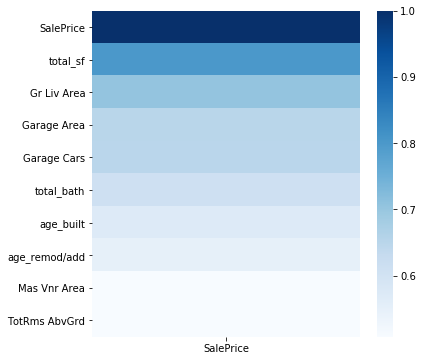

In [16]:
# Plot the heat map for the correlation of numeric features to target variable SalePrice

fig = plt.gcf()
fig.set_size_inches((6, 6))

sns.heatmap(df_corr_numeric.head(10), cmap='Blues') 

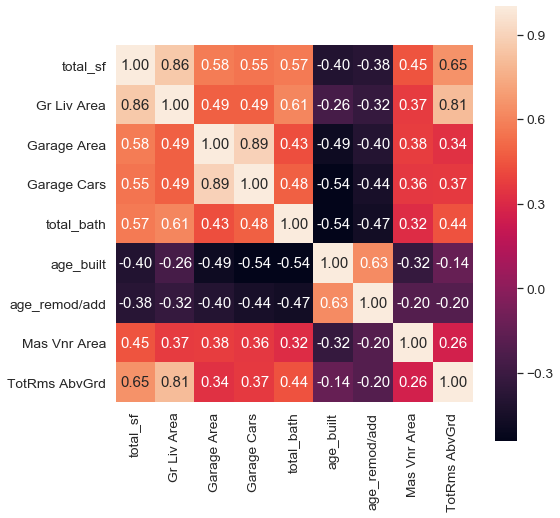

In [17]:
# Plot the correlation heat map between the top 10 variables 
features_selected = list(df_corr_numeric.head(10).index)[1:]

df_numeric = df_train[features_selected]

fig = plt.gcf()
fig.set_size_inches((8, 8))

sns.set(font_scale=1.25)
sns.heatmap(df_numeric.corr(), annot=True, square=True, fmt='.2f')

I will remove Gr Liv Area and Garage Cars to prevent multicollinearity between other variables
- Gr Liv Area is highly correlated to total_sf and TotRmsAbvGrd.
- Garage Cars is highly correlated to Garage Area.

In [ ]:
### At this point it would be good to standardise feature names. Perhaps change everything to lower case, and substitute 
### all with underscores. 

In [18]:
# Remove features Gr Liv Area and Garage Cars from feature columns
features_remove = ['Gr Liv Area', 'Garage Cars']

features_numeric = [feature for feature in list(df_numeric.columns) if feature not in features_remove]

features_numeric

df_numeric = df_train[features_numeric]

<Figure size 432x288 with 0 Axes>

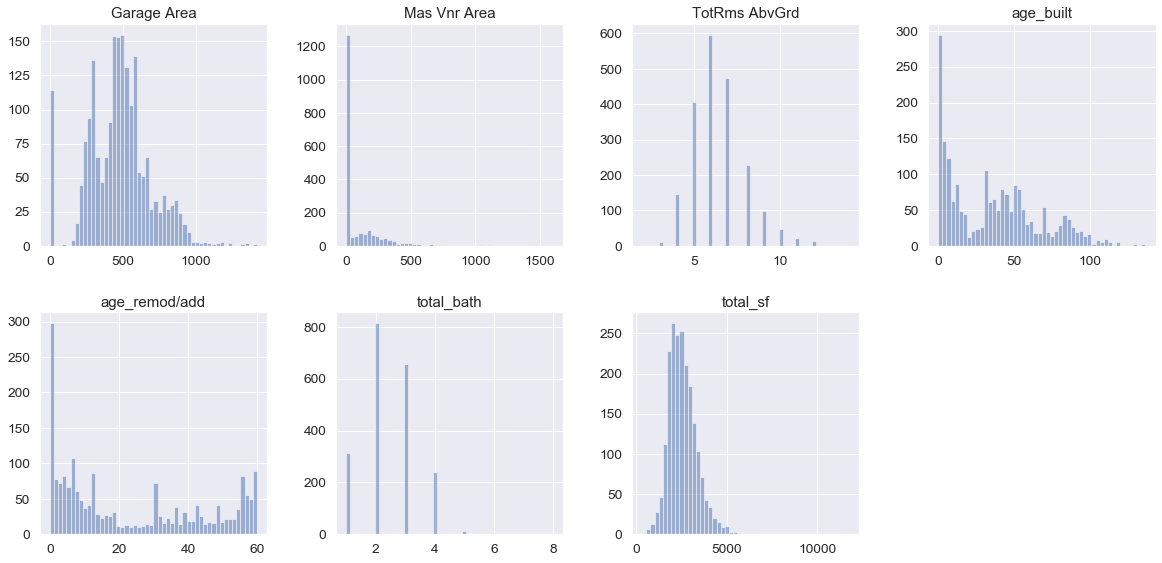

In [19]:
# Plot histogram of selected numeric features
plt.figure()
df_numeric.hist(layout=(4,4), alpha=0.5, bins=50, figsize=(20,20));

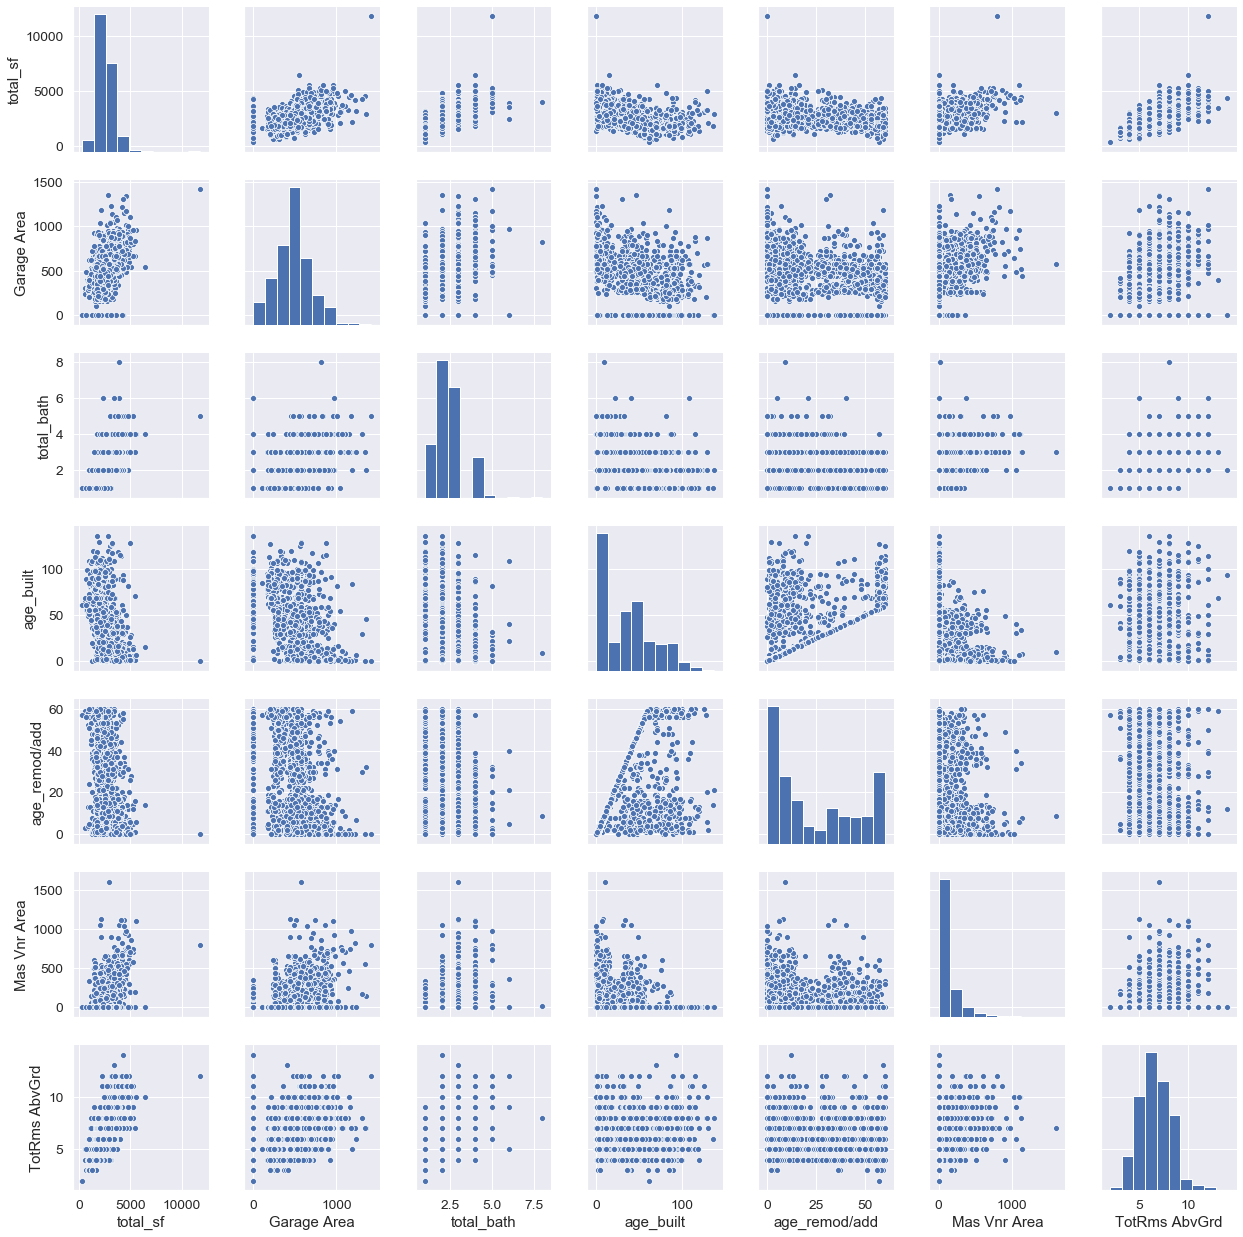

In [20]:
# Plot pair plots of selected numeric features
sns.pairplot(df_numeric)                                ### good

### 4. Feature Selection - Categorical

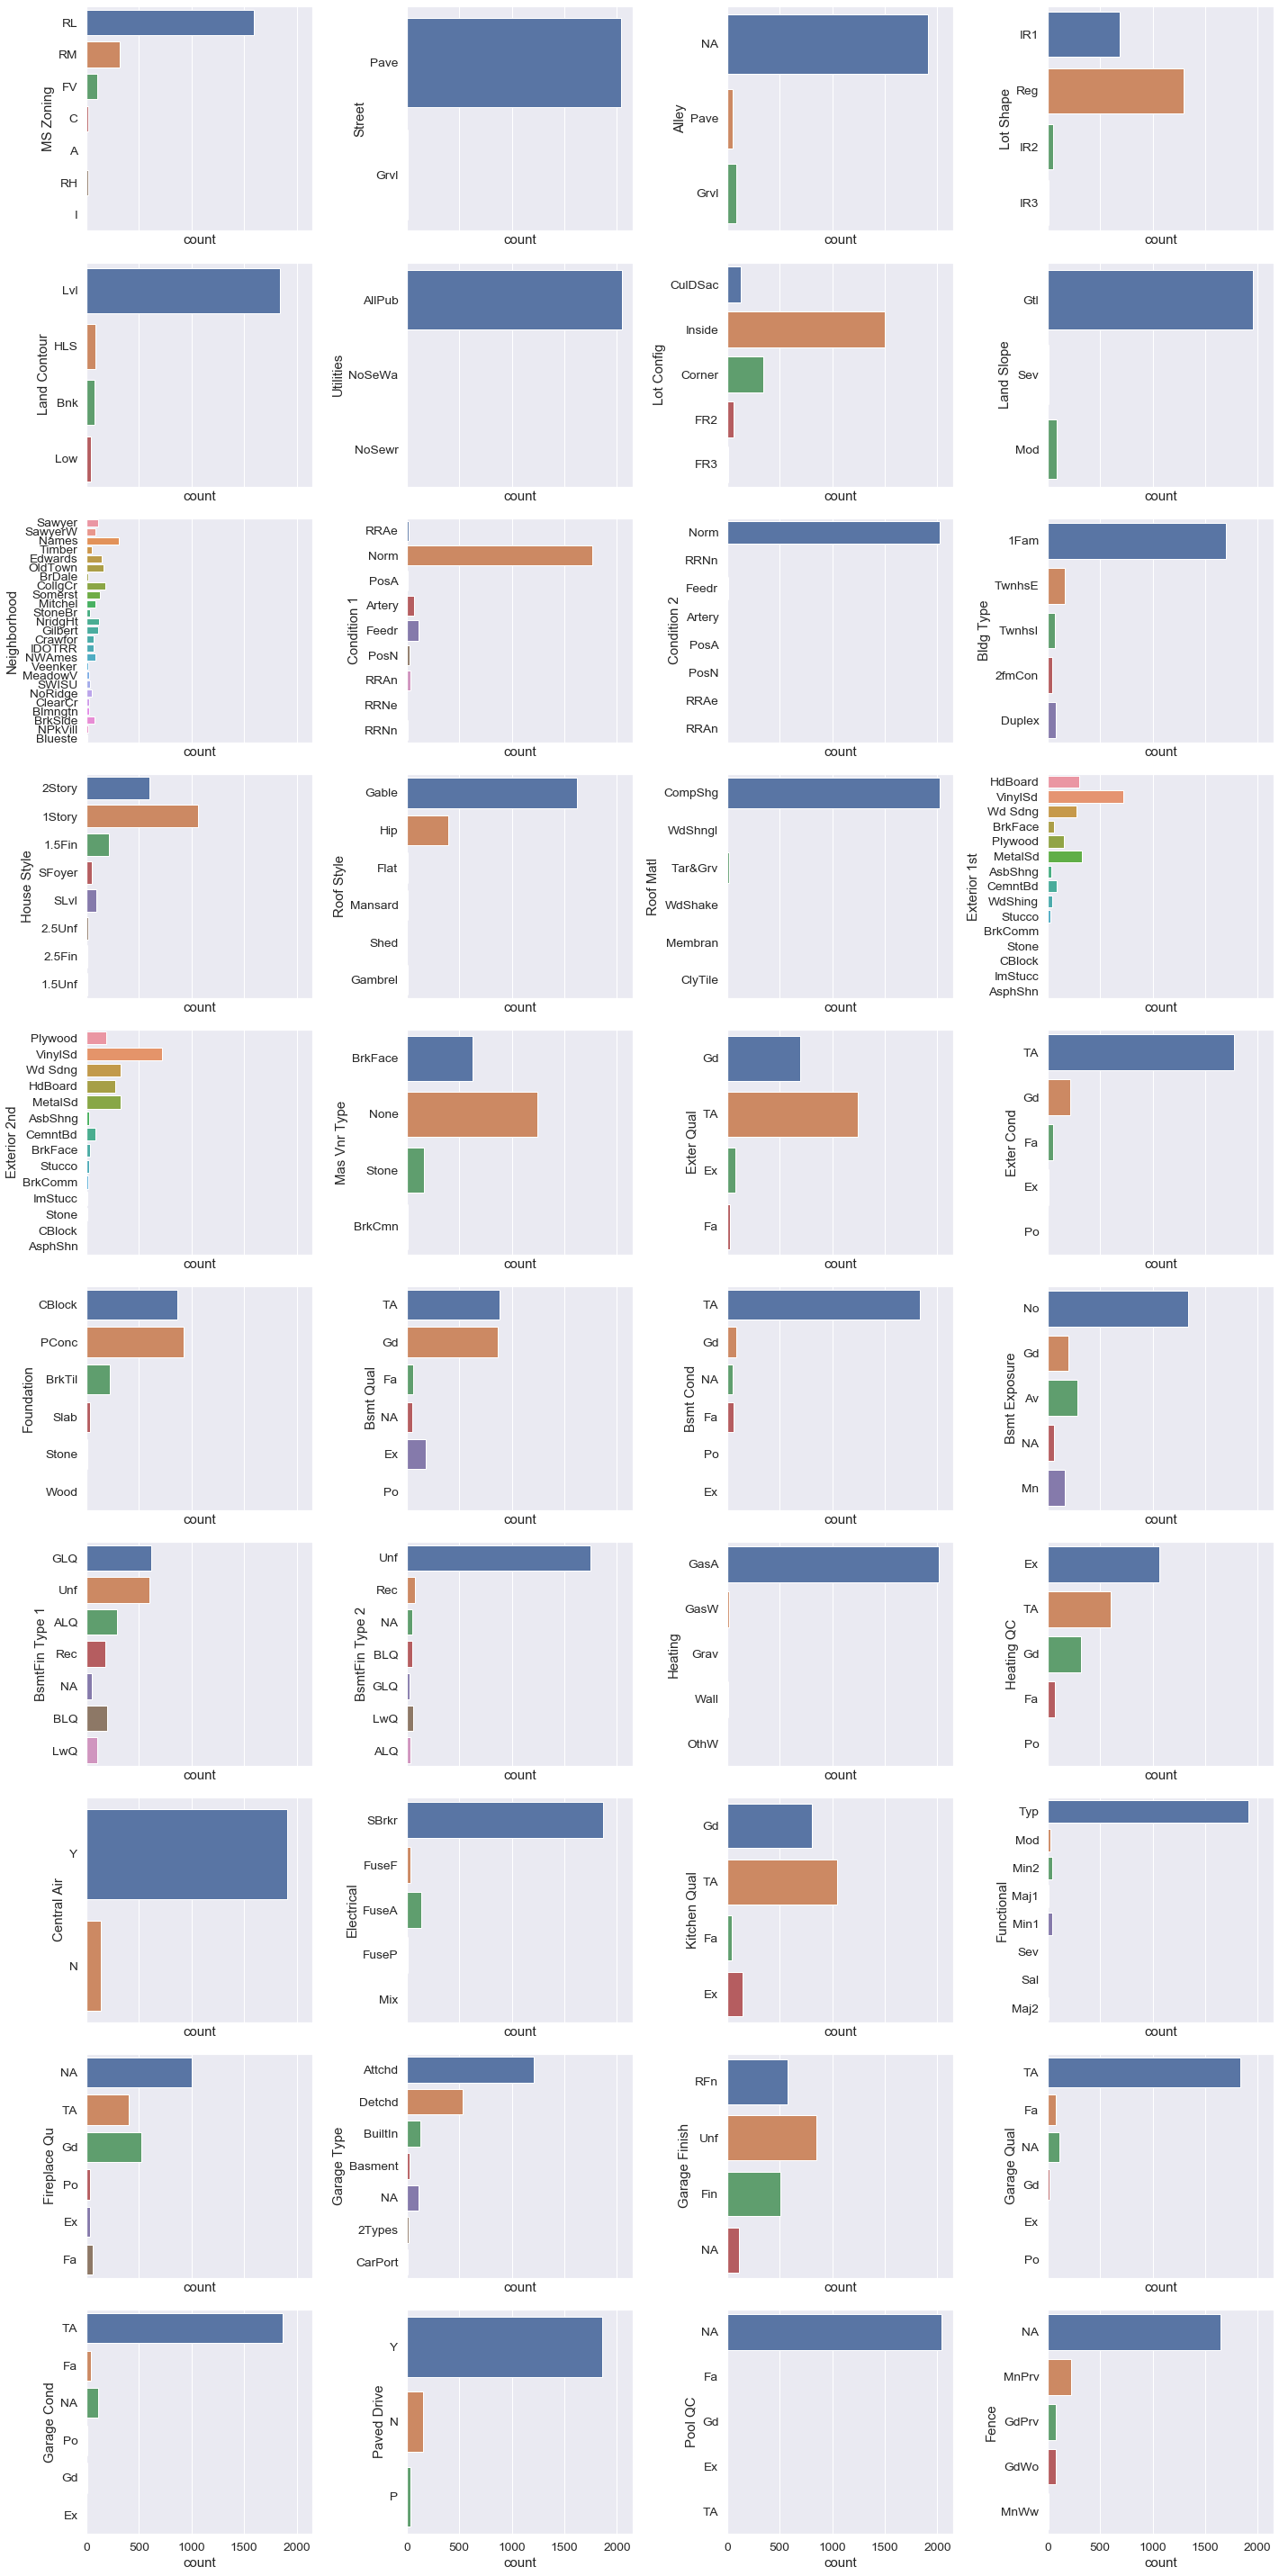

In [21]:
fig, axes = plt.subplots(10,4, figsize=(20,40), sharex=True)
axes = axes.flatten()
object_bol = df_train[features_categorical].dtypes == 'object'

for ax, catplot in zip(axes, df_train[features_categorical].dtypes[object_bol].index):
    sns.countplot(y=catplot, data=df_train[features_categorical], ax=ax)

plt.tight_layout()  
plt.show()

In [22]:
# Create dummy variables for categorial variables in train data set

df_categorial = df_train[features_categorical]

df_categorial_dummies = pd.get_dummies(df_categorial)

df_categorial_dummies.shape

(2049, 265)

In [23]:
# Concatenate numeric and categorical variables of the train data set
df_combined = pd.concat([df_numeric, df_categorial_dummies], axis=1)

df_combined.shape

(2049, 272)

In [24]:
# Concatenate target variable SalePrice to train data set
df_combined = pd.concat([df_combined, df_train['SalePrice']], axis=1)

In [25]:
# Save combined train data set to CSV file
df_combined.to_csv('./datasets/train_all.csv')

In [26]:
# Create dummy variables for categorial variables in test data set

df_categorial = df_test[features_categorical]

df_categorial_dummies = pd.get_dummies(df_categorial)

df_categorial_dummies.shape

(879, 251)

In [27]:
# Concatenate numeric and categorical variables of the test data set

df_numeric = df_test[features_numeric]

df_combined = pd.concat([df_numeric, df_categorial_dummies], axis=1)

df_combined['Id'] = df_test['Id']

df_combined.shape

(879, 259)

In [28]:
# Save combined test data set to CSV file
df_combined.to_csv('./datasets/test_all.csv')

# Modelling

1. [Import Train and Test Data Sets](#1.-Import-Train-and-Test-Data-Sets)
2. [Model Preparation](#2.-Model-Preparation)
3. [Cross-Validation](#3.-Cross-Validation)
4. [Model Fitting and Evaluation](#4.-Model-Fitting-and-Evaluation)
5. [Predict Target Values](#5.-Predict-Target-Values)

### 1. Import Train and Test Data Sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

# Use na_filter paramater to prevent read_csv to import NA strings as NaN values
def get_combined_data(path):
    return pd.read_csv(path, na_filter = False)      ### no real need to write a function since it's a one liner

df_train = get_combined_data('./datasets/train_all.csv')
df_test = get_combined_data('./datasets/test_all.csv')

df_train.head()

,Unnamed: 0,total_sf,Garage Area,total_bath,age_built,age_remod/add,Mas Vnr Area,TotRms AbvGrd,MS SubClass,Overall Qual,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,SalePrice
0,0,2204.0,475.0,3.0,34,5,289.0,6,60,6,...,0,0,0,0,0,0,0,0,1,130500
1,1,3035.0,559.0,4.0,13,12,132.0,8,60,7,...,0,0,0,0,0,0,0,0,1,220000
2,2,2114.0,246.0,2.0,57,3,0.0,5,20,5,...,0,0,0,0,0,0,0,0,1,109000
3,3,1828.0,400.0,3.0,4,3,0.0,7,60,5,...,0,0,0,0,0,0,0,0,1,174000
4,4,2121.0,484.0,2.0,110,17,0.0,6,50,6,...,0,0,0,0,0,0,0,0,1,138500


In [2]:
df_test.head()

,Unnamed: 0,total_sf,Garage Area,total_bath,age_built,age_remod/add,Mas Vnr Area,TotRms AbvGrd,MS SubClass,Overall Qual,...,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Id
0,0,2948,440,2,96,56,0.0,9,190,6,...,0,0,0,0,0,0,0,0,1,2658
1,1,3934,580,2,29,29,0.0,10,90,5,...,0,0,0,0,0,0,0,0,1,2718
2,2,2150,426,4,0,0,0.0,7,60,7,...,0,0,0,0,0,1,0,0,0,2414
3,3,1936,480,1,84,1,0.0,5,30,5,...,0,0,0,0,0,0,0,0,1,1989
4,4,2788,514,3,46,46,247.0,6,20,6,...,0,0,0,0,0,0,0,0,1,625


In [3]:
# Drop Unnamed: 0 column from the train and test data sets
df_train.drop(columns=['Unnamed: 0'], inplace=True)
df_test.drop(columns=['Unnamed: 0'], inplace=True)

### 2. Model Preparation

In [4]:
# Create the features matrix (X) and target vector (y)
features = [feature for feature in df_train.columns if feature != 'SalePrice']

X = df_train[features]
y = df_train['SalePrice']

In [ ]:
### You could have just concaternated the two datasets to each other, performed the 
### pd.get_dummies operation then split them up once you're done.
### since you're forcing drop_first, this is doubly important.
###
### (all categories)  init_col  |                         is_b  | is_c |
###                      a      |                          0    |  0   |
###                      b      |     -- get_dummies-->    1    |  0   |
###                      c      |                          0    |  1   |
###                      a      |                          0    |  0   |    {a} enconde by 0,0
###
### (missing one)     init_col  |                         is_c  |                           is_b  | is_c |
###                      b      |                          0    |                            0    |  0   |
###                      b      |     -- get_dummies-->    0    |    ---adding missing -->   0    |  0   |  which is wrong.
###                      c      |                          1    |                            0    |  1   |  {a,b} encoded
###                      c      |                          1    |                            0    |  1   |  by 0,0
###
### eg if your columns are (a, b ,c) for categories in train, you'd get is_b and is_c for columns in the get_dummies
### if you force drop_fist. But if you only have (b ,c) for categories in test, you'd get is_c for the column in the 
### dummied set, then adding back is_b would be wrong as it would suggest that there are no bs.

In [5]:
# Ensure that both train and test data sets have the same number of columns
for column in X.columns:
    if column not in df_test.columns:
        df_test[column] = 0
        
for column in df_test.columns:
    if column not in X.columns:
        X[column] = 0

In [6]:
X.shape

(2049, 282)

In [7]:
df_test.shape

(879, 282)

In [8]:
# Train, test, split train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.02)  ### The test size is too small

In [9]:
# Scale train data set
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

# Instantiate models
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))      ### Usually use logspace for Ridge

### 3. Cross Validation

In [10]:
# Linear regression CV
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_mean = lr_scores.mean()

print(f'Linear regression CV Scores: {lr_scores}')
print(f'Linear regression CV Mean: {lr_mean}')

Linear regression CV Scores: [0.91996997 0.91280913 0.85828971 0.89119637 0.74206117]
Linear regression CV Mean: 0.8648652703067115


In [11]:
# Perform Lasso CV
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
lasso_mean = lasso_scores.mean()

print(f'Lasso CV Scores: {lasso_scores}')
print(f'Lasso CV Mean: {lasso_mean}')

c:\users\hakng\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\hakng\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\hakng\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\hakng\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default val

Lasso CV Scores: [0.91532613 0.92807049 0.88254589 0.91400964 0.77718922]
Lasso CV Mean: 0.8834282720435264


In [12]:
# Perform Ridge CV
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=5)
ridge_mean = ridge_scores.mean()

print(f'Ridge CV Scores: {ridge_scores}')
print(f'Ridge CV Mean: {ridge_mean}')

Ridge CV Scores: [0.91966323 0.91392879 0.86805696 0.89351841 0.75634876]
Ridge CV Mean: 0.8703032324348797


### 4. Model Fitting and Evaluation

The Lasso model has the best score amongst the 3. I proceed to fit the model to the training data, and evaluate the training and test scores below.

In [13]:
lasso.fit(X_train_sc, y_train)

c:\users\hakng\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [14]:
lasso.score(X_train_sc, y_train)

0.9211075871765644

In [15]:
predictions = lasso.predict(X_test_sc)

r2_score(y_test, predictions)

0.9034228561044964

### 5. Predict Target Values

In [16]:
ss = StandardScaler()

kaggle_test_sc = ss.fit_transform(df_test)

predictions = lasso.predict(kaggle_test_sc)
predictions.mean()


lasso._

181052.40239043825

In [17]:
predictions.shape

(879,)

Create dataframe for Kaggle submission

In [18]:
submission = pd.DataFrame(predictions, columns=['SalePrice'])

submission['Id'] = df_test['Id']

submission.shape

(879, 2)

In [19]:
submission.head()

,SalePrice,Id
0,105687.103908,2658
1,217351.593876,2718
2,186499.901230,2414
3,142328.451848,1989
4,190459.413610,625


In [20]:
submission.to_csv('./datasets/predictions.csv', index=False, columns=['Id', 'SalePrice'] )